## Telecom Churn Solution Vinodh & Senthil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Data 
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.shape

(99999, 226)

In [3]:
telecom_df.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0       101.2   
1        1.0        1.0        NaN  1006         0.0         0.0         0.0   

   sep_vbc_3g  
0        3.58  
1        0.00  

[2 rows x 226 columns]

In [4]:
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

#### Seggregating Columns

In [5]:
#Finding date Columns
date_cols = telecom_df.select_dtypes(include=['object']).columns
date_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [6]:
#Finding Categorical Columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [7]:
# Id col
id_cols = ['mobile_number','circle_id']
id_cols

['mobile_number', 'circle_id']

In [8]:
#Finding Numeric columns
all_cols = set(telecom_df.columns)
all_non_num_cols = set(id_cols) | set(date_cols)
all_non_num_cols = all_non_num_cols | set(cat_cols)
num_cols = all_cols - all_non_num_cols
num_cols

{'aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_mou_9',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2

In [9]:
len(num_cols)

204

###  Preparing Separate Datasets

###### Handling Date Columns

In [10]:
df_date = telecom_df[date_cols]
df_date.head(2)

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN

In [11]:
##### Converting all columns to proper Date Format
for c in df_date.columns:
    df_date[c] = pd.to_datetime(df_date[c])
    
df_date.head(5)

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0           2014-09-30          2014-06-21          2014-07-16   
1           2014-09-30          2014-06-29          2014-07-31   
2           2014-09-30          2014-06-17          2014-07-24   
3           2014-09-30          2014-06-28          2014-07-31   
4           2014-09-30          2014-06-26          2014-07-28   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0          2014-08-08          2014-09-28               2014-06-21   
1          2014-08-28          2014-09-30                      NaT   
2          2014-08-14          2014-09-29                      NaT   
3          2014-08-31          2014-09-30                      NaT   
4          2014-08-09          2014-09-28               2014-06-04   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0               2014-07-16               2014-08-08                      NaT  
1               2014-07-25               2014-08-10                      NaT  
2                      NaT                      NaT               2014-09-17  
3                      NaT                      NaT                      NaT  
4                      NaT                      NaT                      NaT

#### Handling Categorical Columns

In [12]:
df_cat = telecom_df[cat_cols]
df_cat.head(5)

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
0               0.0               0.0               0.0               NaN   
1               NaN               0.0               0.0               NaN   
2               NaN               NaN               NaN               0.0   
3               NaN               NaN               NaN               NaN   
4               0.0               NaN               NaN               NaN   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0        1.0        1.0        1.0        NaN  
1        NaN        1.0        1.0        NaN  
2        NaN        NaN        NaN        1.0  
3        NaN        NaN        NaN        NaN  
4        0.0        NaN        NaN        NaN

#### Handling Numeric Columns

In [13]:
lst_num_cols = list(num_cols)
df_num = telecom_df[lst_num_cols]
df_num.shape

(99999, 204)

## NULL Value Analysis

In [14]:
def getNullPercentage(df_model):
    dict_model_nulls = {}
    for c in df_model.columns:
        if (df_model[c].isnull().sum()>0):
            dict_model_nulls[c] = df_model[c].isnull().sum()

    df_model_nulls = pd.DataFrame()
    df_model_nulls['col'] = dict_model_nulls.keys()
    df_model_nulls['cnt'] = dict_model_nulls.values()
    df_model_nulls['perc'] = (df_model_nulls['cnt']*100)/len(df_model)
    return df_model_nulls

#### Identifying NULL Percentage for Date columns

In [15]:
df_date_nulls = getNullPercentage(df_date)
df_date_nulls

col    cnt       perc
0       last_date_of_month_7    601   0.601006
1       last_date_of_month_8   1100   1.100011
2       last_date_of_month_9   1659   1.659017
3        date_of_last_rech_6   1607   1.607016
4        date_of_last_rech_7   1767   1.767018
5        date_of_last_rech_8   3622   3.622036
6        date_of_last_rech_9   4760   4.760048
7   date_of_last_rech_data_6  74846  74.846748
8   date_of_last_rech_data_7  74428  74.428744
9   date_of_last_rech_data_8  73660  73.660737
10  date_of_last_rech_data_9  74077  74.077741

In [16]:
### Based on later needs logic for handling NULLS will be appled

##### Identifying NULL Percentages for Categorical Columns

In [17]:
df_cat_nulls = getNullPercentage(df_cat)
df_cat_nulls

col    cnt       perc
0  night_pck_user_6  74846  74.846748
1  night_pck_user_7  74428  74.428744
2  night_pck_user_8  73660  73.660737
3  night_pck_user_9  74077  74.077741
4         fb_user_6  74846  74.846748
5         fb_user_7  74428  74.428744
6         fb_user_8  73660  73.660737
7         fb_user_9  74077  74.077741

In [18]:
df_cat['night_pck_user_6'].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [19]:
df_cat['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

##### Observation - Categorical columns have valoes 0 and 1.  Categorical columns are having 74% NULL values.  Current values indicate whether Yes or No. Introducing a new Category Not Applicable as -1

In [20]:
df_cat = df_cat.fillna(-1)
df_cat.isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

##### Identifying NULL Percentages for Numeric Columns

In [21]:
df_num_nulls = getNullPercentage(df_num)
df_num_nulls['perc'].describe()

count    147.000000
mean      18.291217
std       27.281751
min        1.018010
25%        3.937039
50%        5.378054
75%        7.745077
max       74.846748
Name: perc, dtype: float64

In [22]:
### Identifying columns abovw 74% NULL values

In [23]:
df_num_nulls[df_num_nulls['perc'] > 70]

col    cnt       perc
5       count_rech_2g_8  73660  73.660737
6             arpu_3g_7  74428  74.428744
13   av_rech_amt_data_9  74077  74.077741
24      count_rech_2g_9  74077  74.077741
32      max_rech_data_7  74428  74.428744
34      max_rech_data_9  74077  74.077741
37            arpu_3g_6  74846  74.846748
44    total_rech_data_7  74428  74.428744
45   av_rech_amt_data_8  73660  73.660737
51   av_rech_amt_data_7  74428  74.428744
61   av_rech_amt_data_6  74846  74.846748
69    total_rech_data_6  74846  74.846748
70      max_rech_data_6  74846  74.846748
74      count_rech_3g_6  74846  74.846748
75      count_rech_2g_6  74846  74.846748
78      max_rech_data_8  73660  73.660737
84      count_rech_3g_8  73660  73.660737
87      count_rech_3g_9  74077  74.077741
88            arpu_2g_9  74077  74.077741
90      count_rech_3g_7  74428  74.428744
104   total_rech_data_8  73660  73.660737
110           arpu_3g_8  73660  73.660737
111   total_rech_data_9  74077  74.077741
113     count_rech_2g_7  74428  74.428744
114           arpu_2g_6  74846  74.846748
116           arpu_2g_8  73660  73.660737
118           arpu_3g_9  74077  74.077741
120           arpu_2g_7  74428  74.428744

In [24]:
# Identifying all recharge columns
lst_num_cols = list(df_num_nulls['col'])
lst_recharge_cols = []
for col in lst_num_cols:
    if 'rech' in col:
        lst_recharge_cols.append(col)
        
lst_recharge_cols

['count_rech_2g_8',
 'av_rech_amt_data_9',
 'count_rech_2g_9',
 'max_rech_data_7',
 'max_rech_data_9',
 'total_rech_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_7',
 'av_rech_amt_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'max_rech_data_8',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'count_rech_3g_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'count_rech_2g_7']

In [25]:
# Imputing NULL values for Recharge columns with 0

In [26]:
for col in lst_recharge_cols:
    df_num[col] = df_num[col].fillna(0)

In [27]:
df_num[lst_recharge_cols].isnull().sum()

count_rech_2g_8       0
av_rech_amt_data_9    0
count_rech_2g_9       0
max_rech_data_7       0
max_rech_data_9       0
total_rech_data_7     0
av_rech_amt_data_8    0
av_rech_amt_data_7    0
av_rech_amt_data_6    0
total_rech_data_6     0
max_rech_data_6       0
count_rech_3g_6       0
count_rech_2g_6       0
max_rech_data_8       0
count_rech_3g_8       0
count_rech_3g_9       0
count_rech_3g_7       0
total_rech_data_8     0
total_rech_data_9     0
count_rech_2g_7       0
dtype: int64

#### Handling NULL calues in Categorical Variables
- Creating a new category for NULL values with value -1

In [28]:
df_cat = df_cat.fillna(-1)

In [29]:
df_cat.isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [30]:
df_num.shape

(99999, 204)

In [31]:
df_num = pd.concat([df_num,df_cat],axis=1)
df_num.shape

(99999, 212)

#### Dropping variables with more than 70% NULLS

In [32]:
df_num_nulls = getNullPercentage(df_num)
df_num_nulls_70 = df_num_nulls[df_num_nulls['perc'] > 70]
df_num_nulls_70

col    cnt       perc
5    arpu_3g_7  74428  74.428744
32   arpu_3g_6  74846  74.846748
72   arpu_2g_9  74077  74.077741
92   arpu_3g_8  73660  73.660737
94   arpu_2g_6  74846  74.846748
96   arpu_2g_8  73660  73.660737
98   arpu_3g_9  74077  74.077741
100  arpu_2g_7  74428  74.428744

In [33]:
lst_cols_to_drop = list(df_num_nulls_70['col'])
lst_cols_to_drop 

['arpu_3g_7',
 'arpu_3g_6',
 'arpu_2g_9',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_8',
 'arpu_3g_9',
 'arpu_2g_7']

In [34]:
df_num = df_num.drop(lst_cols_to_drop,axis=1)
df_num.shape

(99999, 204)

#### Imputing rest of Column values with Median value

In [35]:
df_num_nulls_2 = getNullPercentage(df_num)
lst_cols_to_impute = list(df_num_nulls_2.col)
for col in lst_cols_to_impute:
    df_num[col] = df_num[col].fillna(df_num[col].median())


In [36]:
df_num_nulls_3 = getNullPercentage(df_num)
df_num_nulls_3 

Empty DataFrame
Columns: [col, cnt, perc]
Index: []

In [37]:
df_num.shape

(99999, 204)

In [38]:
telecom_df.shape

(99999, 226)

### Identifying High Value Customers

Filter high-value customers
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

##### Logic -
- Calculate Average Total Recharge Amount for last four months is calculated  
- Calculate 70 percentile Value
- Filter data > 70 percentile value

##### Calculating Total DATA RECHARGE Amount  for GOOD phase

In [39]:
df_num['total_data_rech_amt_6'] =  df_num['total_rech_data_6'] * df_num['av_rech_amt_data_6']
df_num['total_data_rech_amt_7'] =  df_num['total_rech_data_7'] * df_num['av_rech_amt_data_7']

##### Calculating TOTAL Recharge Amount

In [40]:
df_num['total_amt_6'] = df_num['total_rech_amt_6'] + df_num['total_data_rech_amt_6']
df_num['total_amt_7'] = df_num['total_rech_amt_7'] + df_num['total_data_rech_amt_7']

In [41]:
## Finding Avg Recharge Amount for 4 months
df_num['avg_rech_amt'] = (df_num['total_amt_6'] + df_num['total_amt_7'])/2.0
df_num['avg_rech_amt'].head(10)

0     559.0
1     306.0
2     241.5
3     270.0
4     301.0
5      60.0
6     360.5
7    1185.0
8     696.0
9     284.5
Name: avg_rech_amt, dtype: float64

In [42]:
## Finding 70 Percentile Value
rech_amt_70_perc = df_num['avg_rech_amt'].quantile(0.7)
rech_amt_70_perc

478.0

In [43]:
## Marking those customers as High Value
df_num['high_val'] = df_num['avg_rech_amt'].apply(lambda x: 1 if (x > rech_amt_70_perc ) else 0)
df_num[['avg_rech_amt','high_val']].head(10)

avg_rech_amt  high_val
0         559.0         1
1         306.0         0
2         241.5         0
3         270.0         0
4         301.0         0
5          60.0         0
6         360.5         0
7        1185.0         1
8         696.0         1
9         284.5         0

In [44]:
# Adding Mobile Number

df_high_val = df_num[df_num['high_val'] == 1]
df_high_val.head(5)

arpu_7  roam_ic_mou_6  loc_og_mou_8  sachet_3g_9  vol_2g_mb_9  \
0    214.816           0.00          0.00            0         0.00   
7   1349.850          16.23        255.79            0         0.00   
8    492.223           0.00         63.04            0         0.00   
21   597.753           0.00        129.74            0         0.00   
23   193.897           0.00        182.14            0        13.93   

    total_ic_mou_8  loc_ic_t2m_mou_8  vol_3g_mb_7    arpu_8  roam_og_mou_8  \
0             5.44              4.13       150.76   213.803           0.00   
7           428.74            121.19         0.00  3171.480          38.06   
8            16.54             15.48       750.95   137.362           0.00   
21          261.04            129.16         0.00   637.760           0.00   
23          298.33            146.84       599.09   366.966           0.00   

      ...     fb_user_6  fb_user_7  fb_user_8  fb_user_9  \
0     ...           1.0        1.0        1.0       -1.0   
7     ...          -1.0       -1.0       -1.0       -1.0   
8     ...          -1.0        1.0        1.0       -1.0   
21    ...          -1.0       -1.0       -1.0       -1.0   
23    ...          -1.0        1.0        1.0        1.0   

    total_data_rech_amt_6  total_data_rech_amt_7  total_amt_6  total_amt_7  \
0                   252.0                  252.0        614.0        504.0   
7                     0.0                    0.0       1580.0        790.0   
8                     0.0                  354.0        437.0        955.0   
21                    0.0                    0.0        600.0        680.0   
23                    0.0                  712.0          0.0       1166.0   

    avg_rech_amt  high_val  
0          559.0         1  
7         1185.0         1  
8          696.0         1  
21         640.0         1  
23         583.0         1  

[5 rows x 210 columns]

In [45]:
df_high_val.shape

(29953, 210)

In [46]:
##### Dropping columns used to calculate Average and retaining only Average column

In [47]:
 ## Dropping all Calculated Variables
calc_var = ['total_data_rech_amt_6','total_data_rech_amt_7','total_amt_6','total_amt_7','avg_rech_amt']
df_high_val.drop(calc_var,axis=1,inplace=True)

In [48]:
df_high_val.shape

(29953, 205)

### Derive Churn

3. Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

#### Tagging Churners among High Value Customers

In [49]:
df_high_val[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(10)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00         0.00         0.00
7             0.00            0.00         0.00         0.00
8            34.91          142.18         0.00         0.00
21          252.61         1031.53         0.00         0.00
23          127.48          127.63        13.93       314.74
33          114.16            1.70        30.92      5588.11
38          114.09          708.04         0.00         0.00
41          165.84           89.13         0.00         0.00
48          894.81         2319.01         0.00         0.00
53          680.61          503.06         0.82         0.00

In [50]:
df_high_val['sum_churn_phase'] = df_high_val['total_ic_mou_9']+df_high_val['total_og_mou_9']+df_high_val['vol_2g_mb_9']+df_high_val['vol_3g_mb_9']
df_high_val[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','sum_churn_phase']].head(10)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  sum_churn_phase
0             0.00            0.00         0.00         0.00             0.00
7             0.00            0.00         0.00         0.00             0.00
8            34.91          142.18         0.00         0.00           177.09
21          252.61         1031.53         0.00         0.00          1284.14
23          127.48          127.63        13.93       314.74           583.78
33          114.16            1.70        30.92      5588.11          5734.89
38          114.09          708.04         0.00         0.00           822.13
41          165.84           89.13         0.00         0.00           254.97
48          894.81         2319.01         0.00         0.00          3213.82
53          680.61          503.06         0.82         0.00          1184.49

In [51]:
# If Sum is Zero then Customer can churn. 
df_high_val['churn'] = df_high_val['sum_churn_phase'].apply(lambda x: 1 if x == 0 else 0)

In [52]:
df_high_val[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','sum_churn_phase','churn']].head(10)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  sum_churn_phase  \
0             0.00            0.00         0.00         0.00             0.00   
7             0.00            0.00         0.00         0.00             0.00   
8            34.91          142.18         0.00         0.00           177.09   
21          252.61         1031.53         0.00         0.00          1284.14   
23          127.48          127.63        13.93       314.74           583.78   
33          114.16            1.70        30.92      5588.11          5734.89   
38          114.09          708.04         0.00         0.00           822.13   
41          165.84           89.13         0.00         0.00           254.97   
48          894.81         2319.01         0.00         0.00          3213.82   
53          680.61          503.06         0.82         0.00          1184.49   

    churn  
0       1  
7       1  
8       0  
21      0  
23      0  
33      0  
38      0  
41      0  
48      0  
53      0

In [53]:
df_high_val['churn'] = df_high_val['churn'].astype("category")
churn_ratio = (df_high_val['churn'].value_counts()*100)/df_high_val.shape[0]
churn_ratio

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [54]:
df_high_val.drop('sum_churn_phase',axis=1,inplace=True)

##### Difference Calculation - Action Phase Value - Average of Good Phase 

In [55]:
df_high_val['arpu_diff'] = df_high_val.arpu_8 - ((df_high_val.arpu_6 + df_high_val.arpu_7)/2)

df_high_val['onnet_mou_diff'] = df_high_val.onnet_mou_8 - ((df_high_val.onnet_mou_6 + df_high_val.onnet_mou_7)/2)

df_high_val['offnet_mou_diff'] = df_high_val.offnet_mou_8 - ((df_high_val.offnet_mou_6 + df_high_val.offnet_mou_7)/2)

df_high_val['roam_ic_mou_diff'] = df_high_val.roam_ic_mou_8 - ((df_high_val.roam_ic_mou_6 + df_high_val.roam_ic_mou_7)/2)

df_high_val['roam_og_mou_diff'] = df_high_val.roam_og_mou_8 - ((df_high_val.roam_og_mou_6 + df_high_val.roam_og_mou_7)/2)

df_high_val['loc_og_mou_diff'] = df_high_val.loc_og_mou_8 - ((df_high_val.loc_og_mou_6 + df_high_val.loc_og_mou_7)/2)

df_high_val['std_og_mou_diff'] = df_high_val.std_og_mou_8 - ((df_high_val.std_og_mou_6 + df_high_val.std_og_mou_7)/2)

df_high_val['isd_og_mou_diff'] = df_high_val.isd_og_mou_8 - ((df_high_val.isd_og_mou_6 + df_high_val.isd_og_mou_7)/2)

df_high_val['spl_og_mou_diff'] = df_high_val.spl_og_mou_8 - ((df_high_val.spl_og_mou_6 + df_high_val.spl_og_mou_7)/2)

df_high_val['total_og_mou_diff'] = df_high_val.total_og_mou_8 - ((df_high_val.total_og_mou_6 + df_high_val.total_og_mou_7)/2)

df_high_val['loc_ic_mou_diff'] = df_high_val.loc_ic_mou_8 - ((df_high_val.loc_ic_mou_6 + df_high_val.loc_ic_mou_7)/2)

df_high_val['std_ic_mou_diff'] = df_high_val.std_ic_mou_8 - ((df_high_val.std_ic_mou_6 + df_high_val.std_ic_mou_7)/2)

df_high_val['isd_ic_mou_diff'] = df_high_val.isd_ic_mou_8 - ((df_high_val.isd_ic_mou_6 + df_high_val.isd_ic_mou_7)/2)

df_high_val['spl_ic_mou_diff'] = df_high_val.spl_ic_mou_8 - ((df_high_val.spl_ic_mou_6 + df_high_val.spl_ic_mou_7)/2)

df_high_val['total_ic_mou_diff'] = df_high_val.total_ic_mou_8 - ((df_high_val.total_ic_mou_6 + df_high_val.total_ic_mou_7)/2)

df_high_val['total_rech_num_diff'] = df_high_val.total_rech_num_8 - ((df_high_val.total_rech_num_6 + df_high_val.total_rech_num_7)/2)

df_high_val['total_rech_amt_diff'] = df_high_val.total_rech_amt_8 - ((df_high_val.total_rech_amt_6 + df_high_val.total_rech_amt_7)/2)

df_high_val['max_rech_amt_diff'] = df_high_val.max_rech_amt_8 - ((df_high_val.max_rech_amt_6 + df_high_val.max_rech_amt_7)/2)

df_high_val['total_rech_data_diff'] = df_high_val.total_rech_data_8 - ((df_high_val.total_rech_data_6 + df_high_val.total_rech_data_7)/2)

df_high_val['max_rech_data_diff'] = df_high_val.max_rech_data_8 - ((df_high_val.max_rech_data_6 + df_high_val.max_rech_data_7)/2)

df_high_val['av_rech_amt_data_diff'] = df_high_val.av_rech_amt_data_8 - ((df_high_val.av_rech_amt_data_6 + df_high_val.av_rech_amt_data_7)/2)

df_high_val['vol_2g_mb_diff'] = df_high_val.vol_2g_mb_8 - ((df_high_val.vol_2g_mb_6 + df_high_val.vol_2g_mb_7)/2)

df_high_val['vol_3g_mb_diff'] = df_high_val.vol_3g_mb_8 - ((df_high_val.vol_3g_mb_6 + df_high_val.vol_3g_mb_7)/2)

In [56]:
df_high_val.shape

(29953, 229)

In [57]:
lst_mth_9 = []
for c in df_high_val.columns:
    if '_9' in c:
        lst_mth_9.append(c)
        
lst_mth_9


['sachet_3g_9',
 'vol_2g_mb_9',
 'arpu_9',
 'loc_og_t2m_mou_9',
 'av_rech_amt_data_9',
 'std_og_t2c_mou_9',
 'max_rech_amt_9',
 'count_rech_2g_9',
 'ic_others_9',
 'std_ic_mou_9',
 'isd_og_mou_9',
 'roam_ic_mou_9',
 'max_rech_data_9',
 'onnet_mou_9',
 'loc_ic_t2m_mou_9',
 'vol_3g_mb_9',
 'last_day_rch_amt_9',
 'offnet_mou_9',
 'monthly_3g_9',
 'std_ic_t2o_mou_9',
 'loc_og_t2t_mou_9',
 'loc_ic_mou_9',
 'og_others_9',
 'loc_og_t2c_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_og_t2t_mou_9',
 'total_og_mou_9',
 'total_rech_amt_9',
 'sachet_2g_9',
 'roam_og_mou_9',
 'loc_ic_t2t_mou_9',
 'std_ic_t2t_mou_9',
 'count_rech_3g_9',
 'loc_og_t2f_mou_9',
 'loc_ic_t2f_mou_9',
 'total_rech_num_9',
 'loc_og_mou_9',
 'total_rech_data_9',
 'std_og_mou_9',
 'spl_ic_mou_9',
 'total_ic_mou_9',
 'monthly_2g_9',
 'isd_ic_mou_9',
 'std_ic_t2m_mou_9',
 'spl_og_mou_9',
 'night_pck_user_9',
 'fb_user_9']

In [58]:
df_high_val = df_high_val.drop(lst_mth_9,axis=1)
df_high_val.shape

(29953, 180)

### Handling Outliers
###### Using K-Sigma Technique setting all values above 3 Sigma (Std. Dev) to 3 sigma

In [59]:
df_high_val.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

arpu_7  roam_ic_mou_6  loc_og_mou_8  total_ic_mou_8  \
count  29953.000000   29953.000000  29953.000000    29953.000000   
mean     561.160547      16.124001    238.356745      280.074127   
std      480.028497      76.344227    362.137820      361.356861   
min    -2014.045000       0.000000      0.000000        0.000000   
1%         0.726000       0.000000      0.000000        0.000000   
10%      177.973000       0.000000      1.894000        6.250000   
25%      310.071000       0.000000     32.030000       61.490000   
50%      481.496000       0.000000    111.010000      173.160000   
75%      698.829000       0.000000    310.680000      361.990000   
90%      996.170600      27.422000    608.116000      650.688000   
95%     1261.885600      84.628000    860.612000      915.878000   
99%     1999.521120     343.563200   1664.571600     1726.060000   
max    35145.834000    2613.310000  11039.910000     6066.630000   

       loc_ic_t2m_mou_8   vol_3g_mb_7        arpu_8  roam_og_mou_8  \
count      29953.000000  29953.000000  29953.000000   29953.000000   
mean         148.582700    370.544870    508.890301      19.889295   
std          213.738468    916.078806    502.136278     104.799622   
min            0.000000      0.000000   -945.808000       0.000000   
1%             0.000000      0.000000      0.000000       0.000000   
10%            6.430000      0.000000     84.302800       0.000000   
25%           31.410000      0.000000    231.615000       0.000000   
50%           80.040000      0.000000    427.604000       0.000000   
75%          185.830000    411.000000    661.753000       0.000000   
90%          352.366000   1172.556000    977.546400      28.880000   
95%          510.342000   1786.662000   1255.086400     100.692000   
99%          980.366400   4054.252800   1986.739600     427.068400   
max         4643.490000  28144.120000  33543.624000    5337.040000   

       loc_ic_t2o_mou    jun_vbc_3g       ...        spl_ic_mou_diff  \
count         29953.0  29953.000000       ...           29953.000000   
mean              0.0    158.731865       ...              -0.013859   
std               0.0    416.989501       ...               0.174524   
min               0.0      0.000000       ...             -16.280000   
1%                0.0      0.000000       ...              -0.380000   
10%               0.0      0.000000       ...              -0.130000   
25%               0.0      0.000000       ...               0.000000   
50%               0.0      0.000000       ...               0.000000   
75%               0.0     98.750000       ...               0.000000   
90%               0.0    533.042000       ...               0.000000   
95%               0.0    885.864000       ...               0.150000   
99%               0.0   1946.717200       ...               0.500000   
max               0.0  11166.210000       ...               4.450000   

       total_ic_mou_diff  total_rech_num_diff  total_rech_amt_diff  \
count       29953.000000         29953.000000         29953.000000   
mean          -13.458777            -1.813625           -76.316346   
std           221.991875             6.755857           418.516455   
min         -5710.150000          -147.500000         -6950.000000   
1%           -692.892600           -22.500000         -1207.920000   
10%          -174.505000            -8.000000          -506.000000   
25%           -67.220000            -4.000000          -245.000000   
50%            -5.610000            -1.500000           -57.500000   
75%            44.295000             1.000000            99.500000   
90%           141.817000             4.500000           301.000000   
95%           240.860000             7.500000           479.700000   
99%           621.190800            16.500000          1021.240000   
max          3485.370000           130.500000         14344.500000   

       max_rech_amt_diff  total_rech_data_diff  max_rech_data_diff  \
count       29953.0

In [60]:
## Creating a Function to handle Outlier

In [61]:
def handleOutier(value,n=3):
    high_val = value.mean() + n * value.std()
    low_val = value.mean() - n * value.std()
    value[value < low_val] = low_val
    value[value > high_val] = high_val
    return value

In [62]:
## Finding Numeric Columns again
all_cols =set(df_high_val.columns)
set_num_cols = all_cols - set(cat_cols)
lst_num_cols= list(set_num_cols)
lst_num_cols.remove('churn')
lst_num_cols

['roam_ic_mou_6',
 'arpu_7',
 'total_og_mou_diff',
 'loc_og_mou_8',
 'roam_og_mou_diff',
 'spl_og_mou_diff',
 'total_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'vol_3g_mb_7',
 'vol_3g_mb_diff',
 'arpu_8',
 'roam_og_mou_8',
 'loc_ic_t2o_mou',
 'jun_vbc_3g',
 'count_rech_2g_8',
 'std_og_t2f_mou_7',
 'ic_others_6',
 'arpu_diff',
 'roam_ic_mou_diff',
 'total_rech_amt_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'monthly_2g_6',
 'std_og_t2m_mou_7',
 'total_rech_num_8',
 'max_rech_data_diff',
 'std_ic_t2o_mou_8',
 'loc_ic_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2m_mou_6',
 'sachet_2g_6',
 'max_rech_amt_6',
 'isd_ic_mou_diff',
 'loc_ic_t2f_mou_6',
 'total_rech_num_7',
 'loc_og_t2t_mou_6',
 'onnet_mou_6',
 'monthly_3g_8',
 'loc_og_t2m_mou_7',
 'roam_og_mou_6',
 'total_rech_amt_diff',
 'std_ic_mou_8',
 'loc_og_t2m_mou_8',
 'sachet_3g_6',
 'isd_og_mou_diff',
 'sachet_3g_7',
 'std_og_t2c_mou_8',
 'max_rech_data_7',
 'loc_ic_mou_8',
 'std_og_mou_7',
 'loc_og_t2o_mou',
 'vol_2g_mb_7',
 'loc_ic_t2m_mou_6',
 'max_r

In [63]:
df_high_val[lst_num_cols] = df_high_val[lst_num_cols].apply(handleOutier,axis=0)

In [64]:
df_high_val.shape

(29953, 180)

## Modelling

In [65]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


## Data PreProcessing

In [66]:
df_model = df_high_val.copy(deep=True)

In [67]:
df_model.shape

(29953, 180)

In [68]:
df_model['churn'] = pd.to_numeric(df_model['churn'])

#### Applying Label Encoder for Categorical Columns

In [69]:
cat_cols.remove('night_pck_user_9')
cat_cols.remove('fb_user_9')

In [70]:
df_model['night_pck_user_8'].value_counts()

 0.0    15594
-1.0    14018
 1.0      341
Name: night_pck_user_8, dtype: int64

In [71]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
df_model[cat_cols] = df_model[cat_cols].apply(lambda col: le.fit_transform(col))

In [74]:
df_model[cat_cols].head(10)

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                  1                 1                 1          2   
7                  0                 0                 0          0   
8                  0                 1                 1          0   
21                 0                 0                 0          0   
23                 0                 1                 1          0   
33                 2                 2                 1          2   
38                 0                 0                 0          0   
41                 0                 0                 0          0   
48                 0                 0                 0          0   
53                 1                 1                 1          2   

    fb_user_7  fb_user_8  
0           2          2  
7           0          0  
8           2          2  
21          0          0  
23          2          2  
33          2          2  
38          0          0  
41          0          0  
48          0          0  
53          1          1

In [75]:
X = df_model.copy(deep=True)
y = df_model.churn
X.pop('churn')
print(X.shape)
print(y.shape)

(29953, 179)
(29953,)


#### Train Test Split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20967, 179)
(8986, 179)
(20967,)
(8986,)


### Applying PCA

In [77]:
#### Applying PCA to train data using StandaredScaler and Pipeline 

In [78]:
pca_pipe = Pipeline([('std_scaler',StandardScaler()),('pca',PCA())])

In [79]:
pca_pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [80]:
X_train_pca = pca_pipe.fit_transform(X_train)

In [81]:
# Analyzing PCA model from Pipeline

In [82]:
pca = pca_pipe.named_steps['pca']
df_pca_variance = pd.DataFrame()
df_pca_variance['variance'] = (np.round(np.cumsum(pca.explained_variance_ratio_),4)*100)
df_pca_variance = df_pca_variance.reindex()
df_pca_variance.head(10)

variance
0     11.68
1     20.98
2     26.68
3     31.91
4     36.22
5     39.82
6     42.50
7     45.09
8     47.37
9     49.56

In [83]:
df_pca_variance.shape

(179, 1)

In [84]:
n_comp_90= df_pca_variance[df_pca_variance['variance'] > 90].index.min()
print(n_comp_90)

55


In [85]:
n_comp_95 = df_pca_variance[df_pca_variance['variance']>95].index.min()
print(n_comp_95)

73


In [86]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

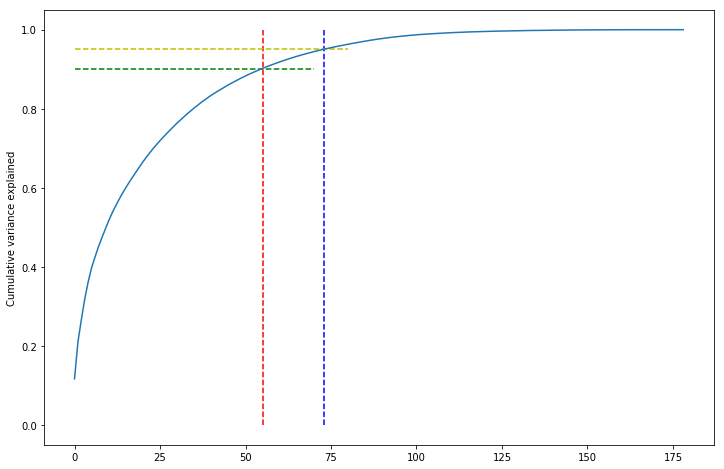

In [87]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=n_comp_90, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=70, xmin=0, colors="g", linestyles="--")
plt.vlines(x=n_comp_95, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="y", linestyles="--")
plt.plot(pca_cumsum)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Based on PCA  - 90% of variability can be explained by 55 components and 95% of variability can be explained by 73 components

### Logistic regression using PCA

In [88]:
# Creating the Pipeline
pca_features = n_comp_90
steps = [('std_scaler',StandardScaler()),
        ('pca',PCA(n_components = pca_features)),
        ('log_reg',LogisticRegression(class_weight='balanced'))                
        ]
log_reg_pipe = Pipeline(steps)

In [89]:
# Fitting the Model
log_reg_pipe.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('log_reg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [90]:
#Checking the Score on Train Data
log_reg_pipe.score(X_train,y_train)

0.8104640625745219

#### Score on Train Data = 0.81

### Model Evaluation using Test Data

In [91]:
y_pred_pca = log_reg_pipe.predict(X_test)

In [92]:
## Creating Confusion Matrix
cm_pca = confusion_matrix(y_test,y_pred_pca)
cm_pca

array([[6750, 1506],
       [ 120,  610]], dtype=int64)

In [93]:
## creating a function for getting Model Parameters

In [94]:
def getModelPerformance(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    recall = TP/float(TP+FN)
    return sensitivity,specificity,precision,recall

In [95]:
sensitivity,specificity,precision,recall = getModelPerformance(cm_pca)
print("Sensitivity = {0}, \n Specificity = {1}, \n Precision = {2}, \n Recall = {3}".format(sensitivity,specificity,precision,recall))

Sensitivity = 0.8356164383561644, 
 Specificity = 0.8175872093023255, 
 Precision = 0.2882797731568998, 
 Recall = 0.8356164383561644


##### Observation - We are interested in Specificity and Recall. Both are having more than 80%

In [96]:
# check area under curve
y_pred_pca_prob = log_reg_pipe.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_pca_prob),2))

AUC:  0.9


##### Area under curve using PCA = 0.89

### Hyper Parameter Tuning on Logistic Regression + PCA

In [97]:
# The churn values are very less compared to Non Churn. Finding the Class imbalance
y_train.value_counts()/y_train.shape[0]

0    0.918777
1    0.081223
Name: churn, dtype: float64

In [98]:
pca_hp = PCA()

#Handling Class imbalance in Logistic Regression
log_reg_hp = LogisticRegression(class_weight={0:0.1,1:0.9})

#Defining steps for Pipeline
steps = [("std_scaler" , StandardScaler()),
         ("pca_hp",pca_hp),
         ("log_reg_hp",log_reg_hp) 
        ] 

# compiling Pipeline
log_reg_hp_pipe = Pipeline(steps)

#Defining Hyperparameter Space
params = {'pca_hp__n_components': [n_comp_90, n_comp_95], 'log_reg_hp__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'log_reg_hp__penalty': ['l1', 'l2']}


#using Stratified K-Fold = 5
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#using GridsearchCV for creating Model
lr_model_hp = GridSearchCV(estimator=log_reg_hp_pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)



In [99]:
lr_model_hp.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_hp', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('log_reg_hp', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
  ...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca_hp__n_components': [55, 73], 'log_reg_hp__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'log_reg_hp__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [100]:
log_reg_hp_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'std_scaler', 'pca_hp', 'log_reg_hp', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'pca_hp__copy', 'pca_hp__iterated_power', 'pca_hp__n_components', 'pca_hp__random_state', 'pca_hp__svd_solver', 'pca_hp__tol', 'pca_hp__whiten', 'log_reg_hp__C', 'log_reg_hp__class_weight', 'log_reg_hp__dual', 'log_reg_hp__fit_intercept', 'log_reg_hp__intercept_scaling', 'log_reg_hp__max_iter', 'log_reg_hp__multi_class', 'log_reg_hp__n_jobs', 'log_reg_hp__penalty', 'log_reg_hp__random_state', 'log_reg_hp__solver', 'log_reg_hp__tol', 'log_reg_hp__verbose', 'log_reg_hp__warm_start'])

In [101]:
pd.DataFrame(lr_model_hp.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.110987      0.087967         0.069784        0.010030   
1        3.502272      0.132123         0.080693        0.020212   
2        3.483161      0.122051         0.080604        0.008306   
3        4.537029      0.211566         0.080884        0.023800   
4        3.093382      0.218248         0.081171        0.014774   
5        3.878507      0.264361         0.079411        0.012363   
6        3.644535      0.159120         0.079653        0.014752   
7        4.990206      0.269101         0.072410        0.003879   
8        2.878166      0.471623         0.085044        0.015100   
9        4.525128      0.744581         0.076241        0.008226   
10       3.394868      0.162507         0.077851        0.009292   
11       5.264962      0.467874         0.093750        0.032252   
12       3.184935      0.345508         0.084353        0.014533   
13       5.412112      2.041095         0.074584        0.008510   
14       3.554161      0.763072         0.067195        0.006387   
15       5.241929      0.503662         0.075163        0.006137   
16       2.794001      0.149586         0.087941        0.010104   
17       5.788271      1.423406         0.089460        0.031276   
18       3.945154      0.409984         0.086157        0.013339   
19       5.829958      0.683279         0.081832        0.011178   
20       2.783660      0.225888         0.087803        0.009574   
21       5.345326      1.792314         0.071983        0.007728   
22       3.534589      0.265000         0.077488        0.011830   
23       5.381347      0.429507         0.081058        0.018905   
24       2.847179      0.393514         0.074300        0.011328   
25       7.548587      4.420447         0.076490        0.009505   
26       3.474232      0.317226         0.089788        0.011369   
27       5.321607      0.776910         0.085867        0.010166   
28       2.837235      0.266523         0.080715        0.015840   
29       6.454125      2.548571         0.067536        0.013492   
30       3.397351      0.251203         0.074955        0.010401   
31       4.327411      0.386322         0.048884        0.007166   

   param_log_reg_hp__C param_log_reg_hp__penalty param_pca_hp__n_components  \
0                  0.1                        l1                         55   
1                  0.1                        l1                         73   
2                  0.1                        l2                         55   
3                  0.1                        l2                         73   
4                  0.5                        l1                         55   
5                  0.5                        l1                         73   
6                  0.5                        l2                         55   
7                  0.5                        l2                         73   
8                    1                        l1                         55   
9                    1                        l1                         73   
10                   1                        l2                         55   
11                   1                        l2                         73   
12                   2                        l1                         55   
13                   2                        l1                         73   
14                   2                        l2                         55   
15                   2                        l2                         73   
16                   3                        l1                         55   
17                   3                        l1                         73   
18                   3                        l2                         55   
19                   3                        l2                         73   
20                   4                        l1                         55   
21                   

### Getting Best HyperParameters

In [102]:
print("Best AUC: ", lr_model_hp.best_score_)
print("Best Hyperparameters: ", lr_model_hp.best_params_)

Best AUC:  0.8902842467992972
Best Hyperparameters:  {'log_reg_hp__C': 4, 'log_reg_hp__penalty': 'l2', 'pca_hp__n_components': 73}


#### Predicting Churn on test Data using these Parameters

In [103]:
y_pred_hp = lr_model_hp.predict(X_test)

##### Evaluating results

In [104]:
cm_hp = confusion_matrix(y_test,y_pred_hp)
cm_hp

array([[7083, 1173],
       [ 133,  597]], dtype=int64)

In [105]:
sensitivity,specificity,precision,recall = getModelPerformance(cm_hp)
print("Sensitivity = {0}, Specificity = {1}, Precision = {2}, Recall = {3}".format(sensitivity,specificity,precision,recall))

Sensitivity = 0.8178082191780822, Specificity = 0.857921511627907, Precision = 0.33728813559322035, Recall = 0.8178082191780822


##### Observation - Specificity and Recall both have improved with Hyper Parameter tuning

In [106]:
# check area under curve
y_pred_hp_prob = lr_model_hp.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_hp_prob),2))

AUC:  0.9


##### AUC Score = 0.89 with Hyper Paameter Tuning

## Creating Interpretable Model

### Random Forest

In [107]:
# creating random forest model - using class weight to handle class imbalance 
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt','log2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rfc_model = GridSearchCV(estimator=rfc, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [108]:
rfc_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [109]:
# Getting best hyperparameters
print("Best AUC: ", rfc_model.best_score_)
print("Best Hyperparameters: ", rfc_model.best_params_)

Best AUC:  0.8794858700204984
Best Hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt'}


##### Observation - Random Forest Best Area Under Curve = 0.88

In [110]:
# Applying model on Test Data
y_pred_rfc = rfc_model.predict(X_test)

In [111]:
# Getting Confusion Matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[8164,   92],
       [ 421,  309]], dtype=int64)

In [112]:
# Calculating Model Perfornamce
sensitivity,specificity,precision,recall = getModelPerformance(cm_rfc)
print("Sensitivity = {0},\n Specificity = {1},\n Precision = {2}, \n Recall = {3}".format(sensitivity,specificity,precision,recall))

Sensitivity = 0.4232876712328767,
 Specificity = 0.9888565891472868,
 Precision = 0.770573566084788, 
 Recall = 0.4232876712328767


##### Observation - Specificity is very high but Recall is poor. 

In [113]:
# check area under curve
y_pred_rfc_prob = rfc_model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_rfc_prob),2))

AUC:  0.88


#### Inference - Compared to RFC - Logistic Regression with Hyper Parameter Tuned model is performing well

### Choosing Important Features

#### For choosing best features Random Forest is used

In [114]:
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rfc_model_2 = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [115]:
rfc_model_2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.2s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [116]:
### Finding Out Of Bag score forvalidating the model
rfc_model_2.oob_score_

0.942194877664902

In [117]:
y_pred_rfc_2 = rfc_model_2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [118]:
cm_rfc_2 = confusion_matrix(y_test,y_pred_rfc_2)
cm_rfc_2

array([[8153,  103],
       [ 405,  325]], dtype=int64)

In [119]:
# Calculating Model Perfornamce
sensitivity,specificity,precision,recall = getModelPerformance(cm_rfc_2)
print("Sensitivity = {0},\n Specificity = {1},\n Precision = {2}, \n Recall = {3}".format(sensitivity,specificity,precision,recall))

Sensitivity = 0.4452054794520548,
 Specificity = 0.9875242248062015,
 Precision = 0.7593457943925234, 
 Recall = 0.4452054794520548


In [120]:
y_pred_rfc_2_prob = rfc_model_2.predict_proba(X_test)[:, 1]
print("ROC: \t", round(roc_auc_score(y_test, y_pred_rfc_2_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC: 	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Finding Important Features

In [121]:
imp_features = rfc_model_2.feature_importances_

In [122]:
all_attributes = list(X_train.columns)

In [123]:
df_feature_importance = pd.DataFrame({'variables':all_attributes,'importance':imp_features*100})
df_feature_importance = df_feature_importance.sort_values(by='importance',ascending=False)
df_feature_importance

variables  importance
3         total_ic_mou_8    6.898460
82        total_og_mou_8    3.881195
156            arpu_diff    3.466597
137   last_day_rch_amt_8    3.361856
6                 arpu_8    3.070863
4       loc_ic_t2m_mou_8    2.535596
172  total_rech_amt_diff    2.518791
55      total_rech_amt_8    2.496593
33      loc_og_t2m_mou_8    2.108702
38          loc_ic_mou_8    2.036013
130     loc_og_t2t_mou_8    1.810268
7          roam_og_mou_8    1.755959
42        max_rech_amt_8    1.680602
141        roam_ic_mou_8    1.664518
144     loc_ic_t2t_mou_8    1.519249
2           loc_og_mou_8    1.497647
160     roam_og_mou_diff    1.424821
170    total_ic_mou_diff    1.408886
171  total_rech_num_diff    1.363723
53    av_rech_amt_data_8    1.343146
84       max_rech_data_8    1.205723
165    total_og_mou_diff    1.168601
162      std_og_mou_diff    1.052935
166      loc_ic_mou_diff    1.028793
159     roam_ic_mou_diff    1.000242
173    max_rech_amt_diff    0.970489
102     loc_ic_t2f_mou_8    0.904346
154            fb_user_8    0.839781
158      offnet_mou_diff    0.828711
50           vol_2g_mb_8    0.801633
..                   ...         ...
51      std_og_t2f_mou_6    0.095789
153            fb_user_7    0.082666
108         spl_ic_mou_7    0.081981
104     std_og_t2f_mou_8    0.078923
89       count_rech_3g_8    0.077123
79       count_rech_3g_6    0.073206
150     night_pck_user_7    0.072902
35           sachet_3g_7    0.066146
34           sachet_3g_6    0.062013
59          monthly_3g_7    0.061324
16          monthly_2g_6    0.051350
73          monthly_2g_7    0.047801
152            fb_user_6    0.046244
29          monthly_3g_8    0.042036
44          monthly_3g_6    0.041936
149     night_pck_user_6    0.041526
71           sachet_3g_8    0.036763
123         monthly_2g_8    0.034789
101          og_others_8    0.006837
105          og_others_7    0.005072
19      std_ic_t2o_mou_8    0.000000
8         loc_ic_t2o_mou    0.000000
135     std_og_t2c_mou_6    0.000000
36      std_og_t2c_mou_8    0.000000
39        loc_og_t2o_mou    0.000000
83      std_og_t2c_mou_7    0.000000
136     std_ic_t2o_mou_7    0.000000
155             high_val    0.000000
138     std_ic_t2o_mou_6    0.000000
120       std_og_t2o_mou    0.000000

[179 rows x 2 columns]

In [124]:
# Extracting all features having importance > 1
df_top_features = df_feature_importance[df_feature_importance['importance'] > 0.9]
len(df_top_features)

27

In [125]:
lst_top_features = list(df_top_features['variables'])
lst_top_features

['total_ic_mou_8',
 'total_og_mou_8',
 'arpu_diff',
 'last_day_rch_amt_8',
 'arpu_8',
 'loc_ic_t2m_mou_8',
 'total_rech_amt_diff',
 'total_rech_amt_8',
 'loc_og_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2t_mou_8',
 'roam_og_mou_8',
 'max_rech_amt_8',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_8',
 'roam_og_mou_diff',
 'total_ic_mou_diff',
 'total_rech_num_diff',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'total_og_mou_diff',
 'std_og_mou_diff',
 'loc_ic_mou_diff',
 'roam_ic_mou_diff',
 'max_rech_amt_diff',
 'loc_ic_t2f_mou_8']

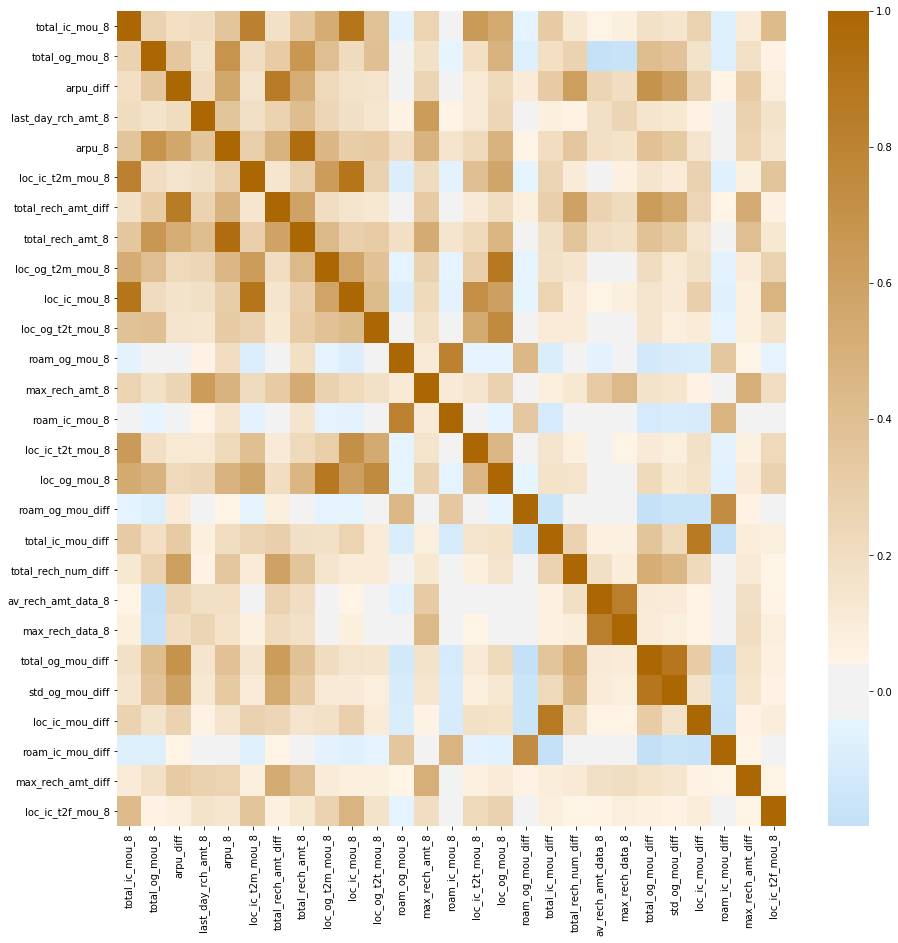

In [126]:
## Creating a Heat Map to see the correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,15)
rfc_cmap = sns.diverging_palette(250, 400, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[lst_top_features].corr(), center=0.0, cmap=rfc_cmap)

In [127]:
## Finding Top Features based on Correlation

In [128]:
def getTopFeaturesBasedOnCorr(data,threshold):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs((corr.iloc[i,j])) >= threshold:
                if columns[j]:
                     columns[j] = False
    return columns
                        
                    


In [129]:
df = X_train[lst_top_features]
selected_columns = getTopFeaturesBasedOnCorr(df,0.6)
top_features = df.columns[selected_columns]
print("Number of features = {0}".format(len(top_features)))
print(top_features)

Number of features = 11
Index(['total_ic_mou_8', 'total_og_mou_8', 'arpu_diff', 'last_day_rch_amt_8',
       'loc_og_t2t_mou_8', 'roam_og_mou_8', 'roam_og_mou_diff',
       'total_ic_mou_diff', 'av_rech_amt_data_8', 'max_rech_amt_diff',
       'loc_ic_t2f_mou_8'],
      dtype='object')


##### Logistic Regression with PCA and Hyper Parameter Tuning is found to be the best performing Model
##### Performing Logistic Regression on Top Features with Hyper Parameter Tuning

In [130]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [131]:

steps = [('std_scaler', StandardScaler()), 
         ("log_reg_top", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
log_reg_top = Pipeline(steps)

# defining hyperparameter space
params = {'log_reg_top__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'log_reg_top__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


model_top = GridSearchCV(estimator=log_reg_top, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [132]:
model_top.fit(X_train_top,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg_top', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'log_reg_top__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'log_reg_top__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [133]:
# Getting best hyperparameters
print("Best AUC: ", model_top.best_score_)
print("Best Hyperparameters: ", model_top.best_params_)

Best AUC:  0.8744896866200426
Best Hyperparameters:  {'log_reg_top__C': 10, 'log_reg_top__penalty': 'l2'}


In [134]:
# performing Model on Test Data

In [135]:
y_pred_top = model_top.predict(X_test_top)

In [136]:
cm_top = confusion_matrix(y_test,y_pred_top)
cm_top

array([[7075, 1181],
       [ 151,  579]], dtype=int64)

In [137]:
# Calculating Model Perfornamce
sensitivity,specificity,precision,recall = getModelPerformance(cm_top)
print("Sensitivity = {0},\n Specificity = {1},\n Precision = {2}, \n Recall = {3}".format(sensitivity,specificity,precision,recall))

Sensitivity = 0.7931506849315069,
 Specificity = 0.856952519379845,
 Precision = 0.32897727272727273, 
 Recall = 0.7931506849315069


In [138]:
#### Sensitivity, Specificity and Recall are Good.

#### Getting Intercepts and Coefiicients from Logistic Model

In [139]:
lr_model_final = model_top.best_estimator_.named_steps['log_reg_top']

In [140]:
#Finding Intercept
df_intercept = pd.DataFrame(lr_model_final.intercept_,columns=['intecept'])
df_intercept

intecept
0 -1.491865

In [141]:
#Finding Coefficients
df_coefficients = pd.DataFrame(lr_model_final.coef_,columns=top_features)
df_coefficients

total_ic_mou_8  total_og_mou_8  arpu_diff  last_day_rch_amt_8  \
0       -1.054603       -0.267022   -0.43329           -0.219914   

   loc_og_t2t_mou_8  roam_og_mou_8  roam_og_mou_diff  total_ic_mou_diff  \
0         -0.153589       0.314434         -0.102163          -0.426017   

   av_rech_amt_data_8  max_rech_amt_diff  loc_ic_t2f_mou_8  
0           -0.763835           -0.08365         -0.170103

In [142]:
df_model_params = pd.concat([df_intercept,df_coefficients],axis=1)
df_model_params

intecept  total_ic_mou_8  total_og_mou_8  arpu_diff  last_day_rch_amt_8  \
0 -1.491865       -1.054603       -0.267022   -0.43329           -0.219914   

   loc_og_t2t_mou_8  roam_og_mou_8  roam_og_mou_diff  total_ic_mou_diff  \
0         -0.153589       0.314434         -0.102163          -0.426017   

   av_rech_amt_data_8  max_rech_amt_diff  loc_ic_t2f_mou_8  
0           -0.763835           -0.08365         -0.170103

## Insights and Recommendations for Business

- ### Insights for Telecom company for identifying Churn is
    - ##### Keep a close watch on the Total Incoming calls on the number. Higher the better
    - ##### If the Recharge amount is high then customer is likely to stay
    - ##### Incoming and outgoing number of calls to Fixed lines has a small bearing on churn. Higher number of calls is better
    - ##### Increase in Mobile Internet usage is a good indicator that customer is likely to stay. 
    - ##### Number of times customer is recharging and recharge amount if any one or both are high then customer is likely to stay
- ### Recommendations are 
    - ### Roaming charges have a significant effect of Churn. Company has to relook at roaming rates and policies
    - ### STD & ISD rates is a significant factor.  Company has to reduce the STD / ISD rates or offer special discount packages for high value customers
    - ### Maximum Recharge Amount is an indicator for Churn. If the recharge for a perticular month is significally less than average of previous months (Good Phase) then it is an indication of customer churn. Cudtomer is looking for other options

#### Top Features

#### Number of features = 11
['total_ic_mou_8', 
 'total_og_mou_8', 
 'arpu_diff', 
 'last_day_rch_amt_8',
  'loc_og_t2t_mou_8', 
  'roam_og_mou_8', 
  'roam_og_mou_diff',       
 'total_ic_mou_diff', 
 'av_rech_amt_data_8', 
 'max_rech_amt_diff',
'loc_ic_t2f_mou_8'],
  